Install libraries

In [ ]:
!pip install git+https://github.com/maxymnaumchyk/awkward-zipper.git

  Cloning https://github.com/maxymnaumchyk/awkward-zipper.git to /tmp/pip-req-build-mvp0qy7q
  Running command git clone --filter=blob:none --quiet https://github.com/maxymnaumchyk/awkward-zipper.git /tmp/pip-req-build-mvp0qy7q
  Resolved https://github.com/maxymnaumchyk/awkward-zipper.git to commit dd3613d1da6b934240f01845392317c6e94b731d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/scikit-hep/awkward (to revision main) to /tmp/pip-install-r9r8y74u/awkward_3d58eb0a685741c0bbc580e5c5080ec1
  Running command git clone --filter=blob:none --quiet https://github.com/scikit-hep/awkward /tmp/pip-install-r9r8y74u/awkward_3d58eb0a685741c0bbc580e5c5080ec1
  Resolved https://github.com/scikit-hep/awkward to commit 8e2d4a85420e89617ccf5be0edef841d3b2d57bf
  Running command git submodule update --init --recursive -q
  Installing build dependencies ... done
  Getting requirements t

Use a branch from main to load virtual arrays with uproot

In [ ]:
!pip install uproot@git+https://github.com/scikit-hep/uproot5@pfackeldey/uproot_lazy

  Cloning https://github.com/scikit-hep/uproot5 (to revision pfackeldey/uproot_lazy) to /tmp/pip-install-gc9d60kr/uproot_34e3315b4eb448c89caf404c61e204ab
  Running command git clone --filter=blob:none --quiet https://github.com/scikit-hep/uproot5 /tmp/pip-install-gc9d60kr/uproot_34e3315b4eb448c89caf404c61e204ab
  Running command git checkout -b pfackeldey/uproot_lazy --track origin/pfackeldey/uproot_lazy
  Switched to a new branch 'pfackeldey/uproot_lazy'
  Branch 'pfackeldey/uproot_lazy' set up to track remote branch 'pfackeldey/uproot_lazy' from 'origin'.
  Resolved https://github.com/scikit-hep/uproot5 to commit 892961513afd630bacd2495628c70b2c878da63a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 886.3/886.3 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 638.7/638.7 kB 35.6 MB/s eta 0:00:00
  Created wheel for uproot: filename=up

Download test root file

In [ ]:
!wget {'https://raw.githubusercontent.com/scikit-hep/coffea/refs/heads/master/tests/samples/nano_dy.root'}

--2025-06-09 16:22:50--  https://raw.githubusercontent.com/scikit-hep/coffea/refs/heads/master/tests/samples/nano_dy.root
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 352599 (344K) [application/octet-stream]
Saving to: ‘nano_dy.root’

nano_dy.root        100%[===================>] 344.33K  --.-KB/s    in 0.03s   

2025-06-09 16:22:50 (13.2 MB/s) - ‘nano_dy.root’ saved [352599/352599]



Import libraries

In [ ]:
import awkward
import uproot

Let's load the example data in [NanoAOD](https://twiki.cern.ch/twiki/bin/view/CMSPublic/WorkBookNanoAOD) format:

In [ ]:
# Create a TTree from root
tree = uproot.open("nano_dy.root")["Events"]
# TTree -> awkward.Array[awkward.Record[str, awkward.Array]]
array = tree.arrays(ak_add_doc=True)

In [ ]:
array.show()

[{run: 1, luminosityBlock: 13889, event: 3749778, HTXS_Higgs_pt: 0, ...},
 {run: 1, luminosityBlock: 13889, event: 3749762, HTXS_Higgs_pt: 0, ...},
 {run: 1, luminosityBlock: 13889, event: 3749777, HTXS_Higgs_pt: 0, ...},
 {run: 1, luminosityBlock: 13889, event: 3749768, HTXS_Higgs_pt: 0, ...},
 {run: 1, luminosityBlock: 13889, event: 3749761, HTXS_Higgs_pt: 0, ...},
 {run: 1, luminosityBlock: 13889, event: 3749773, HTXS_Higgs_pt: 0, ...},
 {run: 1, luminosityBlock: 13889, event: 3749781, HTXS_Higgs_pt: 0, ...},
 {run: 1, luminosityBlock: 13889, event: 3749786, HTXS_Higgs_pt: 0, ...},
 {run: 1, luminosityBlock: 13889, event: 3749788, HTXS_Higgs_pt: 0, ...},
 {run: 1, luminosityBlock: 13889, event: 3749783, HTXS_Higgs_pt: 0, ...},
 ...,
 {run: 1, luminosityBlock: 13889, event: 3749862, HTXS_Higgs_pt: 0, ...},
 {run: 1, luminosityBlock: 13889, event: 3749866, HTXS_Higgs_pt: 0, ...},
 {run: 1, luminosityBlock: 13889, event: 3749861, HTXS_Higgs_pt: 0, ...},
 {run: 1, luminosityBlock: 13889

The resulting data is a list of records. Each record represents a single event and all of its parameters data. For example here's some of the data for the first event in our file:

In [ ]:
array[0].show(50)

{run: 1,
 luminosityBlock: 13889,
 event: 3749778,
 HTXS_Higgs_pt: 0,
 HTXS_Higgs_y: nan,
 HTXS_stage1_1_cat_pTjet25GeV: 0,
 HTXS_stage1_1_cat_pTjet30GeV: 0,
 HTXS_stage1_1_fine_cat_pTjet25GeV: 0,
 HTXS_stage1_1_fine_cat_pTjet30GeV: 0,
 HTXS_stage_0: 0,
 HTXS_stage_1_pTjet25: 0,
 HTXS_stage_1_pTjet30: 0,
 HTXS_njets25: 0,
 HTXS_njets30: 0,
 btagWeight_CSVV2: 0.951,
 btagWeight_DeepCSVB: 0.893,
 CaloMET_phi: 2.79,
 CaloMET_pt: 32.1,
 CaloMET_sumEt: 652,
 ChsMET_phi: 2.51,
 ChsMET_pt: 33.7,
 ChsMET_sumEt: 784,
 nCorrT1METJet: 5,
 CorrT1METJet_area: [0.579, 0.449, 0.509, 0.519, 0.638],
 CorrT1METJet_eta: [-2.36, 4.33, 2.27, 3.92, 2.62],
 CorrT1METJet_muonSubtrFactor: [3.59e-08, 1.08e-08, ..., 7.16e-09, -2.98e-08],
 CorrT1METJet_phi: [0.387, 2.03, 1.56, 2.39, -0.405],
 CorrT1METJet_rawPt: [12.9, 15.3, 10.2, 14.9, 9.41],
 nElectron: 0,
 Electron_deltaEtaSC: [],
 Electron_dr03EcalRecHitSumEt: [],
 Electron_dr03HcalDepth1TowerSumEt: [],
 Electron_dr03TkSumPt: [],
 Electron_dr03TkSumPtHEEP: []

## Awkward-zipper example usage

The goal of the awkward-zipper package is to restructure the record of each event. These records are restructured in the same manner as in [Coffea package](https://coffea-hep.readthedocs.io/en/v2025.1.1/api/coffea.nanoevents.NanoAODSchema.html).

In [ ]:
from awkward_zipper import NanoAOD

restructure = NanoAOD(version="latest")
result = restructure(array)

<ipython-input-16-4e778724ceb1>:4: RuntimeWarning: Missing cross-reference index for LowPtElectron_electronIdx => Electron
  result = restructure(array)
<ipython-input-16-4e778724ceb1>:4: RuntimeWarning: Missing cross-reference index for LowPtElectron_genPartIdx => GenPart
  result = restructure(array)
<ipython-input-16-4e778724ceb1>:4: RuntimeWarning: Missing cross-reference index for LowPtElectron_photonIdx => Photon
  result = restructure(array)
<ipython-input-16-4e778724ceb1>:4: RuntimeWarning: Missing cross-reference index for FatJet_genJetAK8Idx => GenJetAK8
  result = restructure(array)
/usr/local/lib/python3.11/dist-packages/awkward_zipper/kernels.py:122: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  out[i::n] = idx


In [ ]:
# awkward.materialize(result)

In [ ]:
result

<NanoEventsArray [<NanoAOD event>, ...] type='40 * event'>

Now let's go step by step how awkward-zipper reconstructs the original NanoAOD data.

## How the new fields are added


Now let's go step by step how awkward-zipper reconstructs the original NanoAOD data.

In [ ]:
from awkward_zipper.kernels import counts2offsets, local2globalindex, nestedindex

Any branches named `n{name}` are assumed to be counts branches can be converted to offsets `o{name}` using using `counts2offsets` helper function

In [ ]:
array["nJet"]

<Array [5, 8, 5, 3, 5, 8, ..., 2, 3, 1, 6, 2] type='40 * uint32[parameters=...'>

*Note: How the functions(kernels) like `counts2offsets` work is the main difference between awkward-zipper and coffea. awkward-zipper does its inner calculations on awkward arrays, while coffea does them using [forms and buffers](https://awkward-array.org/doc/main/reference/generated/ak.to_buffers.html).*



*This change will make it easier for users to create their own ‘schemas’ (or modify existing ones)*

In [ ]:
counts2offsets(array["nJet"])

array([  0,   5,  13,  18,  21,  26,  34,  38,  42,  43,  52,  54,  62,
        64,  68,  73,  77,  82,  87,  94,  98, 101, 106, 115, 118, 123,
       127, 134, 139, 147, 152, 156, 158, 162, 171, 174, 176, 179, 180,
       186, 188])

Any local index branches with names matching `{source}_{target}Idx*` are converted to global indexes for the event chunk (postfix `G`).
All local indices and their correlating global indices are taken from `NanoAOD.all_cross_references` dictionary

In [ ]:
local_index = "Jet_electronIdx1"

cross_referense = NanoAOD.all_cross_references[local_index]
global_index = "n" + cross_referense

array["Jet_electronIdx1G"] = local2globalindex(array[local_index], array[global_index])
array["Jet_electronIdx1G"]

<Array [[-1, -1, -1, -1, -1], ..., [-1, ...]] type='40 * [var * int64, para...'>

Any `NanoAOD.nested_items` are constructed, if the necessary branches are available

In [ ]:
array["Jet_electronIdx2G"] = local2globalindex(
    array["Jet_electronIdx2"], array["nElectron"]
)
nestedindex([array["Jet_electronIdx1G"], array["Jet_electronIdx2G"]])

/usr/local/lib/python3.11/dist-packages/awkward_zipper/kernels.py:100: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  out[i::n] = idx


<Array [[[-1, -1], [...], ..., [-1, -1]], ...] type='40 * [var * var * int6...'>

In the same manner any `awkward_zipper.NanoAOD.nested_index_items` and `awkward_zipper.NanoAOD.special_items` are constructed, if the necessary branches are available. You can find all these functions at `awkward_zipper.kernels`

## These fields are then grouped by name, where if:

one branch exists named name and no branches start with name_, it gets interpreted as a single flat array;

In [ ]:
# Example: Each event has only one Run Id. Interpreted flat array will look look like this:
result.run

<Array [1, 1, 1, 1, 1, 1, ..., 1, 1, 1, 1, 1] type='40 * uint32[parameters=...'>

one branch exists named name, one named n{name}, and no branches start with name_, it gets interpreted as a single jagged array;

In [ ]:
# Example: Each event has a flat array of PS Weights. Interpreted single jagged array will look look like this:
result.PSWeight

<Array [[1.01, 1.26, 0.99, 0.791], ..., [...]] type='40 * [var * float32, p...'>

no branch exists named {name} and many branches start with name_*, they get interpreted as a flat table; or

In [ ]:
# Example: Each event has a SINGLE Generator. Each Generator consists of a record of Generator parameters. These parameters can be scalars or flat arrays. Interpreted flat table will look look like this:
result.Generator

<NanoCollectionArray [{id2: -1, x1: 0.214, ...}, ..., {...}] type='40 * Nan...'>

one branch exists named n{name} and many branches start with name_*, they interpreted as a jagged table.

In [ ]:
# Example: Each event has an array of Jets. Each Jet consists of a record of Jet parameters. These parameters can be scalars or flat arrays. Interpreted jagged table will look look like this:
result.Jet

<JetArray [[Jet, ..., Jet], ...] type='40 * var * Jet[cleanmask: uint8[para...'>

Finally, all collections are then zipped into one NanoEvents record and returned.

Final result:

In [ ]:
result

<NanoEventsArray [<NanoAOD event>, ..., <NanoAOD event>] type='40 * event'>

In [ ]:
result.Jet.mass

<Array [[11.7, 8.94, ..., 3.81, 4.23], ...] type='40 * var * float32[parame...'>

## Zipper with virtual arrays

Let's load the same root file but as virtual arrays. Virtual arrays don't load the data from disk (or in other words don't materialize the data).

In [ ]:
# Create a TTree from root
tree = uproot.open("nano_dy.root")["Events"]
# to load virtual arrays
access_log = []  # which of the data was materialized
# TTree -> awkward.Array[awkward.Record[str, awkward.Array]]
array = tree.virtual_arrays(ak_add_doc=True, access_log=access_log)

Calling zipper

In [ ]:
restructure = NanoAOD(version="latest")
result = restructure(array)

<ipython-input-19-76941848e4f5>:2: RuntimeWarning: Missing cross-reference index for LowPtElectron_electronIdx => Electron
  result = restructure(array)
<ipython-input-19-76941848e4f5>:2: RuntimeWarning: Missing cross-reference index for LowPtElectron_genPartIdx => GenPart
  result = restructure(array)
<ipython-input-19-76941848e4f5>:2: RuntimeWarning: Missing cross-reference index for LowPtElectron_photonIdx => Photon
  result = restructure(array)
<ipython-input-19-76941848e4f5>:2: RuntimeWarning: Missing cross-reference index for FatJet_genJetAK8Idx => GenJetAK8
  result = restructure(array)


In [ ]:
access_log

[]

In [ ]:
result

<NanoEventsArray [<NanoAOD event>, ..., <NanoAOD event>] type='40 * event'>

In [ ]:
result.Jet

<JetArray [??, ??, ??, ??, ..., ??, ??, ??, ??] type='40 * var * Jet[cleanm...'>

In [ ]:
result[0].Jet

<JetArray [Jet, ...] type='5 * Jet[cleanmask: uint8[parameters={"__doc__": ...'>

In [ ]:
access_log

[Accessed(branch='nJet', buffer_key="('<root>', 'nJet')-data")]

In [ ]:
array.nJet

<Array [5, 8, 5, 3, 5, 8, ..., 2, 3, 1, 6, 2] type='40 * uint32[parameters=...'>

## Example calculation of a Z-peak

In [ ]:
zcands = awkward.combinations(result.Muon, 2)

In [ ]:
access_log

[Accessed(branch='nMuon', buffer_key="('<root>', 'nMuon')-data")]

In [ ]:
# count invariant mass
mass = awkward.flatten((zcands["0"] + zcands["1"]).mass)

We can see that for this, 4-vector coordinates were loaded, which were used to add the combinations

In [ ]:
access_log

[Accessed(branch='nMuon', buffer_key="('<root>', 'nMuon')-data"),
 Accessed(branch='Muon_pt', buffer_key="('<root>', 'Muon_pt', None)-data"),
 Accessed(branch='Muon_phi', buffer_key="('<root>', 'Muon_phi', None)-data"),
 Accessed(branch='Muon_eta', buffer_key="('<root>', 'Muon_eta', None)-data"),
 Accessed(branch='Muon_mass', buffer_key="('<root>', 'Muon_mass', None)-data"),
 Accessed(branch='Muon_charge', buffer_key="('<root>', 'Muon_charge', None)-data")]

In [ ]:
%%capture
!pip install "hist[plot]"

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7b4d8583b350>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

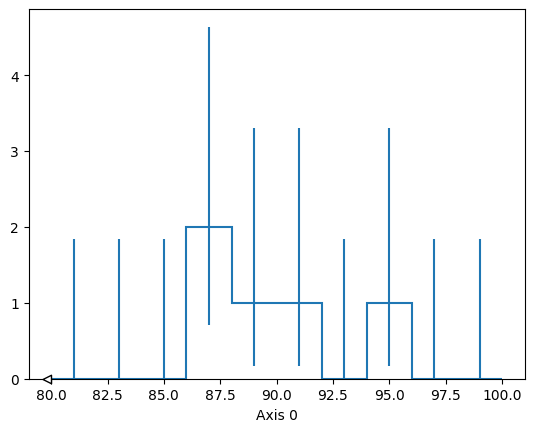

In [ ]:
from hist import Hist

Hist.new.Reg(10, 80, 100).Double().fill(mass).plot()

In [ ]:
result.Muon

<MuonArray [[], [], [], [], ..., [], [], [], []] type='40 * var * Muon[jetR...'>

In [ ]:
result.Muon[4][0].show(300)

{jetRelIso: ??,
 pt: 76.8,
 sip3d: ??,
 isTracker: ??,
 mediumPromptId: ??,
 nTrackerLayers: ??,
 pfRelIso03_chg: ??,
 cleanmask: ??,
 pfIsoId: ??,
 pfRelIso04_all: ??,
 dzErr: ??,
 genPartFlav: ??,
 tunepRelPt: ??,
 miniPFRelIso_chg: ??,
 eta: 0.714,
 genPartIdx: ??,
 miniIsoId: ??,
 tightId: ??,
 dxy: ??,
 tightCharge: ??,
 triggerIdLoose: ??,
 jetIdx: ??,
 ptErr: ??,
 nStations: ??,
 miniPFRelIso_all: ??,
 pfRelIso03_all: ??,
 mvaTTH: ??,
 softMva: ??,
 pdgId: ??,
 mediumId: ??,
 isGlobal: ??,
 highPtId: ??,
 looseId: ??,
 ip3d: ??,
 inTimeMuon: ??,
 isPFcand: ??,
 mass: 0.106,
 tkRelIso: ??,
 phi: 1.64,
 dz: ??,
 softId: ??,
 charge: -1,
 mvaId: ??,
 segmentComp: ??,
 mvaLowPt: ??,
 tkIsoId: ??,
 multiIsoId: ??,
 fsrPhotonIdx: ??,
 dxyErr: ??,
 jetPtRelv2: ??,
 softMvaId: ??,
 fsrPhotonIdxG: ??,
 jetIdxG: ??,
 genPartIdxG: ??}
